# Lista 2
### Zadanie 1

In [ ]:
import random
import os
import time
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import tracemalloc

In [ ]:
print("hello word")

inf

In [44]:
def findMaximum(S):
    a = len(S)
    if a == 0:
        return -math.inf
    if a == 1:
        maximum = S[0]
        return maximum
    p = a // 2
    firstHalfMax = findMaximum(S[:p])
    secondHalfMax = findMaximum(S[p:])
    if firstHalfMax >= secondHalfMax:
        return firstHalfMax
    return secondHalfMax


def executionTime(function, lenght):
    averageTime = 0
    for i in range(50):
        S = [random.randint(-1000, 1000) for _ in range(lenght)]
        start = time.time()
        function(S)
        end = time.time()
        averageTime += end - start
    return averageTime / 50


def memoryUsage(function, lenght):
    averageMemory = 0
    for i in range(50):
        S = [random.randint(-1000, 1000) for _ in range(lenght)]
        tracemalloc.start()
        function(S)
        averageMemory += tracemalloc.get_traced_memory()[1]
        tracemalloc.stop()
    return averageMemory / 50

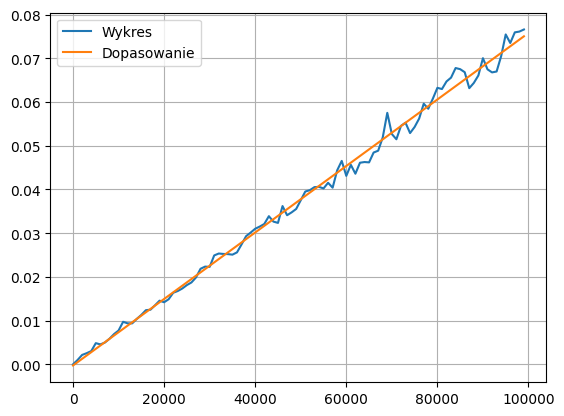

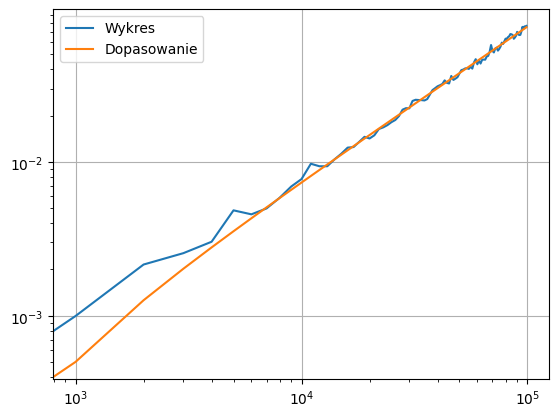

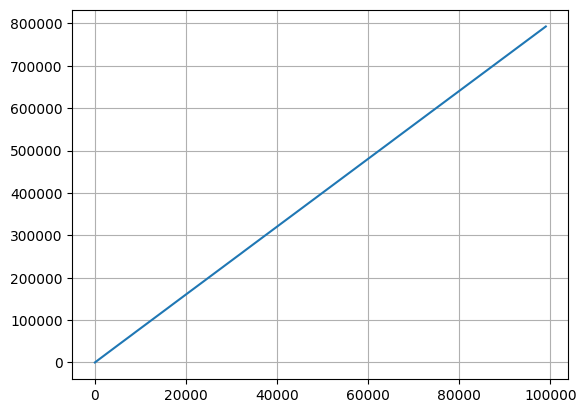

In [45]:
timeList = []
numberOfIter = 100
for i in range(numberOfIter):
    timeList.append(executionTime(findMaximum, i* 1000))

x = np.array([_*1000 for _ in range(numberOfIter)])

def test(x, a, b):
    return a*x + b

param, param_cov = curve_fit(test, x, timeList)
ans = (param[0]*x + param[1])

plt.plot(x, timeList)
plt.plot(x, ans)
plt.legend(["Wykres", "Dopasowanie"])
plt.grid(True)
plt.show()


plt.loglog(x, timeList)
plt.loglog(x, ans)
plt.legend(["Wykres", "Dopasowanie"])
plt.grid(True)
plt.show()

memoryList = []
for i in range(numberOfIter):
    memoryList.append(memoryUsage(findMaximum, i* 1000))

plt.plot(x, memoryList)
plt.grid(True)
plt.show()

### Zadanie 2

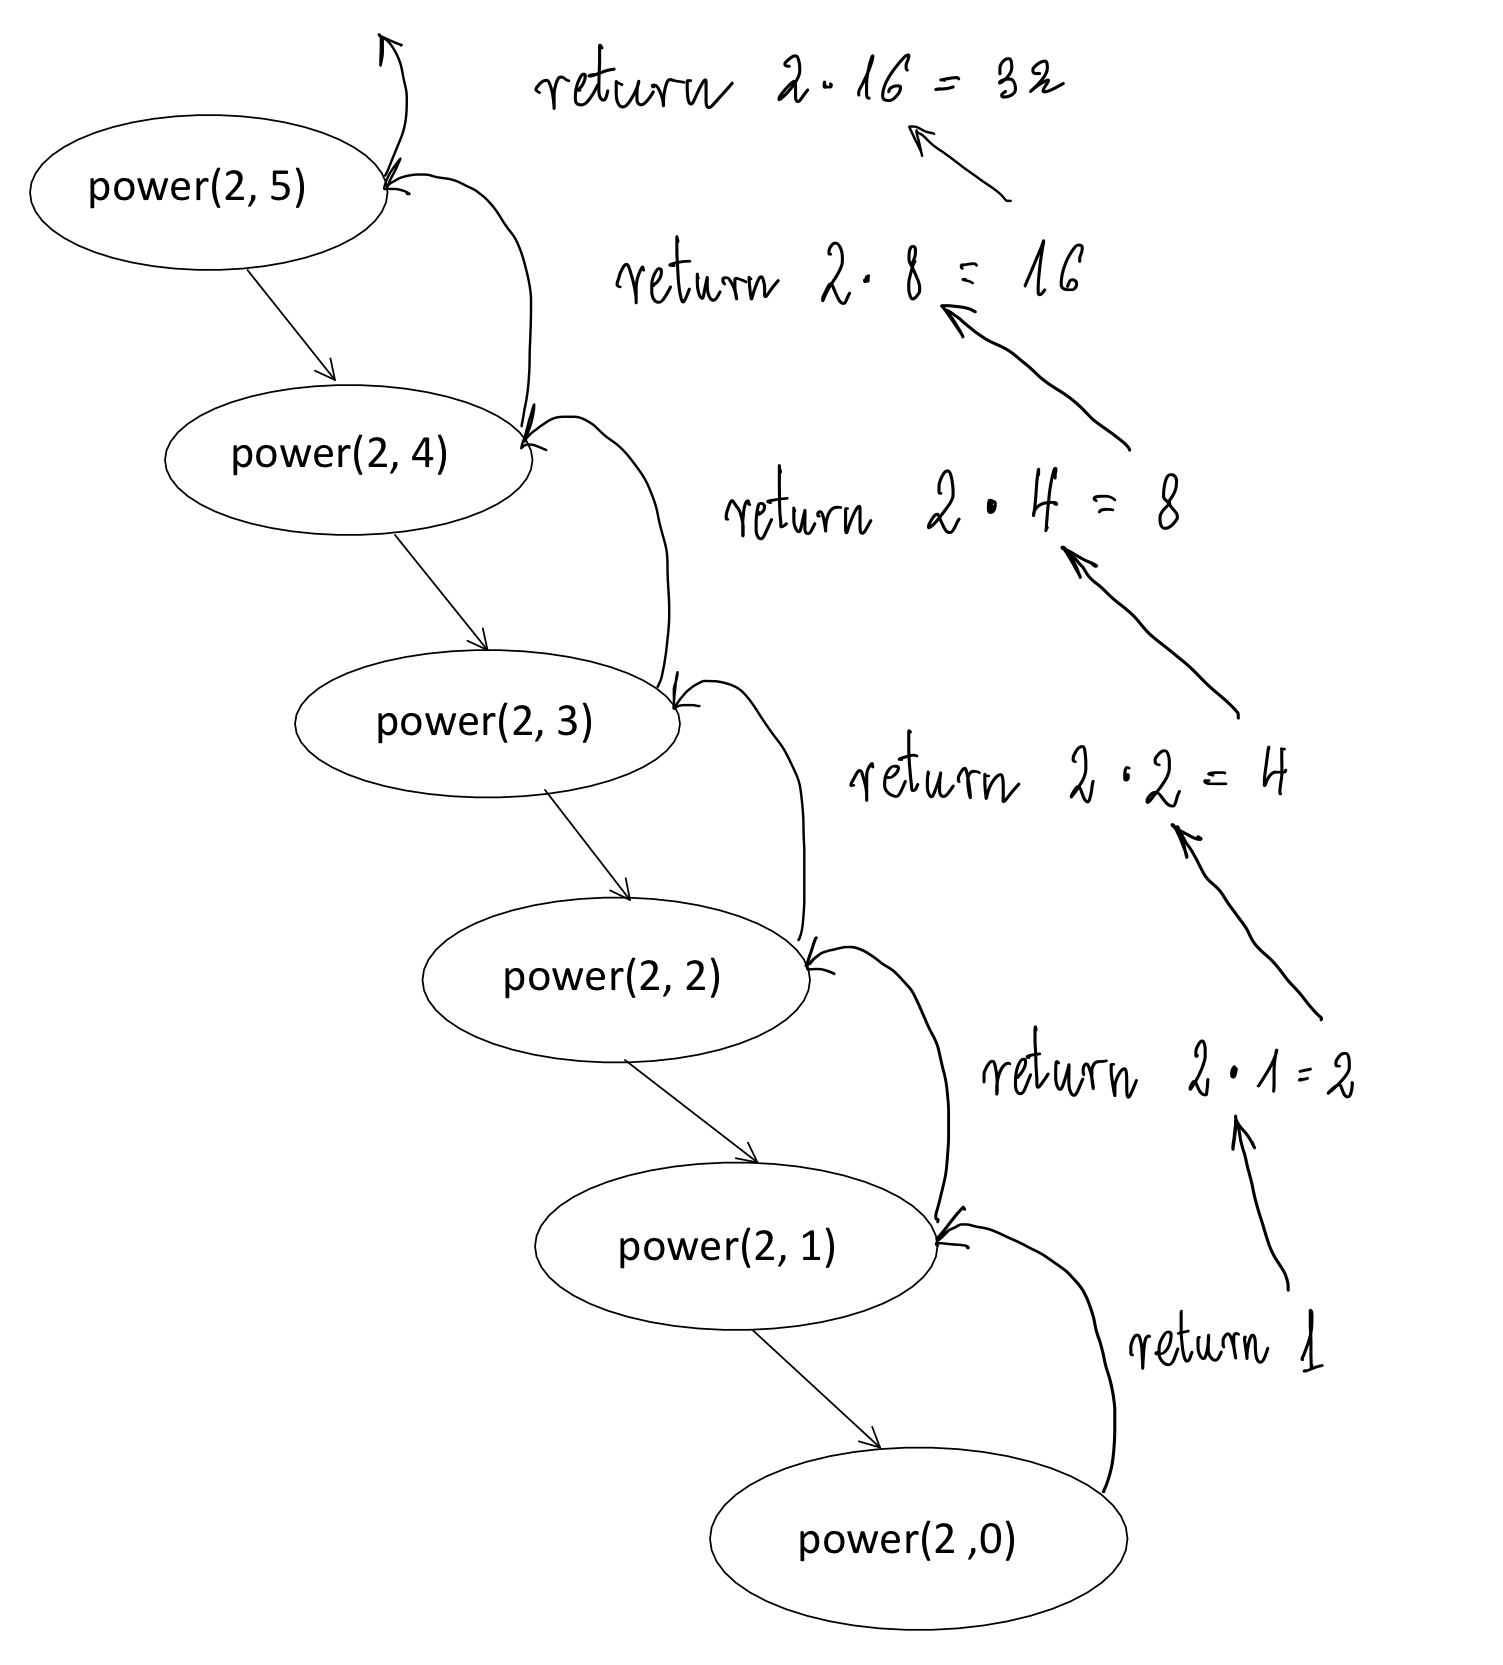

### Zadanie 3

In [12]:
def maxAndMin(S):
    if len(S) == 1:
        max = min = S[0]
        return max, min
    firstHalf = maxAndMin(S[:len(S)//2])
    secondHalf = maxAndMin(S[len(S)//2:])
    if firstHalf[0] >= secondHalf[0]:
        if firstHalf[1] <= secondHalf[1]:
            return firstHalf
        return firstHalf[0], secondHalf[1]
    if firstHalf[1] <= secondHalf[1]:
        return secondHalf[0], firstHalf[1]
    return secondHalf

In [14]:
S = [random.uniform(-100.0, 100.0) for i in range(100)]
print(S)
print(maxAndMin(S))

[32.470358162520654, 75.52192038525368, -71.56389499691528, -41.01060320150805, -97.99980291060575, 30.70023057242355, 67.04630299088808, -73.08341801127973, -41.9095394341902, -75.34778181460379, 99.90546456621922, 57.53477069192027, -55.60172765392579, -40.720992895293364, 27.972979101799808, -63.2150012758667, -62.373566178683774, -90.27138232087508, -71.51053019864948, 85.86634306811254, 98.72787260344967, -86.672404972676, 98.45577573711739, 84.23304012496178, -76.53629484926488, -50.35327078210889, 17.416410103892517, -54.2497327272603, 32.712409332978154, -83.78350030293959, -11.072776456447713, -14.86995838495892, -38.90560074573073, 54.42037900471868, -26.680032212949058, -11.047763271575576, 1.8747004075743519, 82.34660888130216, 20.277642584957036, -41.955842047167465, 9.989624294936434, -60.46053742463378, -44.839069019569976, -22.249857644578654, 82.80662023059838, 32.725777319238034, -72.73201045832865, 95.57002954934418, 57.5927074017263, 38.80955875329053, 81.2666785417

### Zadanie 4

In [15]:
def prodOfMultipl(m, n, acc: int=0):
    if m == 0:
        return acc
    return prodOfMultipl(m-1, n, acc+n)

In [16]:
print(prodOfMultipl(12, 12))

144


### Zadanie 5

In [17]:
def palindrom(word):
    return len(word) <= 1 or word[0] == word[len(word)-1] and palindrom(word[1:len(word)-1])

In [18]:
print(palindrom("kobyłamamałybok")) 
print(palindrom("akacja"))

True
False


### Zadanie 6

In [3]:
def find(path, filename, depth=3):
    if depth == 0:
        return []
    files = []
    for fileOrDir in os.listdir(path):
        fileOrDirPath = os.path.join(path, fileOrDir)
        if os.path.isdir(fileOrDirPath):
            files += find(fileOrDirPath, filename, depth - 1)
        elif fileOrDir == filename:
            files.append(fileOrDirPath)
    return files

In [7]:
def createDirAndFiles(path, file_prob, dir_prob,  depth=3):
    if depth == 0:
        return
    a = 5
    b = 1
    c = 1
    while a != 0:
        if file_prob <= random.random():
            new_path = os.path.join(path, f"file{b}.txt")
            b += 1
            with open(new_path, 'w'):
                pass
        if dir_prob <= random.random():
            new_path = os.path.join(path, f"directory{c}")
            c += 1
            os.mkdir(new_path)
            createDirAndFiles(new_path, file_prob, dir_prob, depth-1)
        a -= 1

parent_dir = "C:\\Users\\Zuzia\\PycharmProjects\\pythonProject3\\Lista2algorytmy"
new_path = os.path.join(parent_dir, "directory")
os.mkdir(new_path)

createDirAndFiles(new_path, 0.5, 0.25)

In [8]:
find(new_path, "file1.txt")

['C:\\Users\\Zuzia\\PycharmProjects\\pythonProject3\\Lista2algorytmy\\directory\\directory1\\file1.txt',
 'C:\\Users\\Zuzia\\PycharmProjects\\pythonProject3\\Lista2algorytmy\\directory\\file1.txt']